# Práctica 5 (notebook)

En esta práctica se implementa el modelo de Barabasi-Albert que genera una red con independencia de escala. El modelo fue propuesto por Lászlo Barabási y Réka Albert en 1999 ([artículo](https://web.archive.org/web/20120417112354/http://www.nd.edu/~networks/Publication%20Categories/03%20Journal%20Articles/Physics/EmergenceRandom_Science%20286,%20509-512%20(1999).pdf)).

Esta implementación hace lo siguiente:

1. Generar una red inicial con ```m0``` nodos. No importa su número de nodos ni su forma, sólo debe ser conexa.
2. A cada paso debe:
 - calcular la probabilidad de enlace de cada nodo de la red que será proporcional a su grado. Si tienen un vector grado, el vector de probabilidad no es más que grado / suma(grado)
 - agregar un nodo ( G.add_node() ) y enlazarlo con ```m``` nodos viejos elegidos según la probabilidad calculada antes. Se recomienda usar la función ```np.random.choice()``` aplicada a la lista de nodos viejos y la probabilidad ([manual](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)) sin reemplazo
3. Después de hacer lo anterior muchas veces (unas de 10000 o más) calcular la distribución de grado de la red resultante y verificar que se comporta como una red con independencia de escala.
4. En caso de que sí, calcular el exponente de la ley de potencia de la distribución.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

Con la siguiente celda se genera la semilla, la red inicial sobre la que se agregarán nodos. Puedes jugar con el tamaño de la semilla y el número de enlaces que tendrá cada nuevo nodo

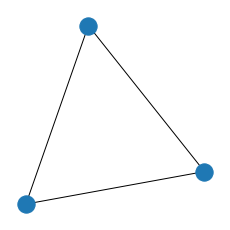

In [ ]:


m0 = 3 #tamano de la semilla
m = 1 #numero de enlaces que tiene cada nuevo nodo
G = nx.Graph()

for i in range(m0):
    G.add_node(i)
G.add_edges_from(list(permutations(list(G),2))) #se hace una red completa de tamano m0

plt.figure(figsize = [3,3])
nx.draw(G)

En la siguiente celda se agrega un nodo según la regla de enlace preferencial respecto al grado. Primero se genera el arreglo de los grados de los nodos, se normaliza para que sea una probabilidad de enlace y se utiliza para seleccionar los nodos con los que se enlazará. Puedes correr la celda cada vez para ver el nodo agregado y la evolución de la red

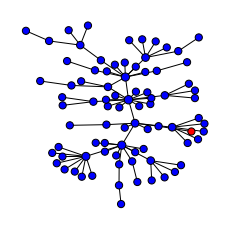

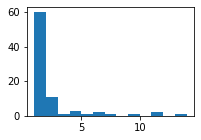

In [ ]:
grados = np.array(list(G.degree(nodo) for nodo in G))
probabilidades = grados / sum(grados)
nodos = np.random.choice(list(G), size = m, p = probabilidades, replace = False)
i = len(G)
G.add_node(i)
for j in nodos:
    G.add_edge(i, j)

color = ['b' for i in G]
color[-1] = 'r'
tamanio = np.array(list(G.degree(nodo) for nodo in G))
tamanio = tamanio/tamanio.sum()
plt.figure(figsize = [3,3])
nx.draw_kamada_kawai(G, node_color = color, node_size = 250*tamanio+50, edgecolors='black')
plt.show()

plt.figure(figsize = [3,2])
grados = np.array(list(G.degree(nodo) for nodo in G))
plt.hist(grados, bins = range(1,max(grados)+1))
plt.show()

12

Ahora se puede correr muchas veces, 10000 por ejemplo

In [ ]:
for i in range(len(G),10000): #para 100000 ya tarda un rato
    grados = np.array(list(dict(G.degree).values()))
    probabilidades = grados / sum(grados)
    nodos = np.random.choice(list(G), size = m, p = probabilidades, replace = False)
    G.add_node(i)
    for j in nodos:
        G.add_edge(i, j)

## Análisis de grado

[]

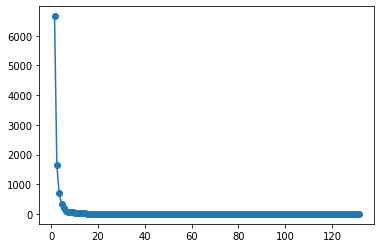

In [ ]:
grados = list(dict(G.degree).values())

y, x = np.histogram(grados, bins = max(grados))
x_med = (x[:-1] + x[1:])*.5

plt.plot(x_med, y, 'o-')
plt.plot()

[]

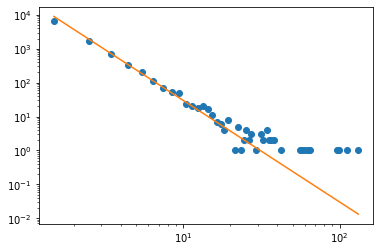

In [ ]:
y, x = np.histogram(grados, bins = max(grados))
x_med = (x[:-1] + x[1:])*.5

plt.plot(x_med, y, 'o')
plt.plot(x_med, 30000*x_med**(-3.), '-')
plt.yscale('log')
plt.xscale('log')
plt.plot()

In [ ]:
max_log = np.log10(max(grados))
log_bin = np.logspace(0, max_log, 20)

[]

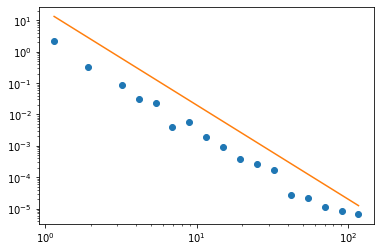

In [ ]:
y, x = np.histogram(grados, bins = log_bin, density = True)
x_med = (x[:-1] + x[1:])*.5

plt.plot(x_med, y, 'o')
plt.plot(x_med, 20*x_med**(-3.), '-')

plt.yscale('log')
plt.xscale('log')
plt.plot()